# Carga de datos

In [ ]:
# prompt: instalar unidecode

!pip install unidecode
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
#from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
#from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from wordcloud import WordCloud
import unidecode
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
ubi = './data/ODScat_345.xlsx'

In [ ]:
df_ods = pd.read_excel(ubi)

# Entendimiento de los datos

## 1.1 Perfilamiento de datos

In [ ]:
df_ods.shape

(4049, 2)

Se evidencion que hay 4049 opiniones sobre problematicas relacionadas con los ODS

In [ ]:
df_ods.sample(5)

,Textos_espanol,sdg
3202,"Por lo tanto, necesitan desarrollar fuertes ví...",4
2667,"Prensa feminista, 2007), pág. 212. Comenzó a e...",5
1374,"El maestro de preescolar, el maestro de primer...",4
1106,Aquellos que hablan un idioma europeo tienen p...,4
4022,"Además, el plan no solo cubre al ejército cana...",5


La informacion cuenta con dos columnas, la primera Textos_espanol contiene el texto con la opinion del ciudadano, la segunda es el numero de ODS que le corresponde (columna que debemos predecir)

In [ ]:
df_ods['sdg'].value_counts()

,count
sdg,
5,1451
4,1354
3,1244


El DataFrame df_ods['sdg'] contiene la clasificación de las opiniones ciudadanas asociadas a los Objetivos de Desarrollo Sostenible (ODS) 3, 4, y 5. La distribución es la siguiente:
ODS 5 (Igualdad de género): 1451 opiniones.
ODS 4 (Educación de calidad): 1354 opiniones.
ODS 3 (Salud y bienestar): 1244 opiniones.
Esto sugiere que la mayor parte de las opiniones están relacionadas con el ODS 5.

In [ ]:
longitudes = df_ods['Textos_espanol'].apply(len)
df_ods['text_length'] = longitudes
longitudes.to_frame()

,Textos_espanol
0,944
1,476
2,1207
3,1090
4,895
...,...
4044,822
4045,514
4046,445
4047,1017


In [ ]:
longitudes.describe().to_frame()

,Textos_espanol
count,4049.000000
mean,699.632502
std,228.988965
min,294.000000
25%,531.000000
50%,657.000000
75%,827.000000
max,1513.000000


El campo Textos_espanol contiene las opiniones en español, y se ha calculado la longitud de cada texto.
Las características de las longitudes son:
Número de textos: 4049 opiniones.
Longitud promedio de los textos: 699.63 caracteres.
Desviación estándar: 228.99 caracteres.
Mínimo: 294 caracteres.
Mediana (50%): 657 caracteres.
Máximo: 1513 caracteres.
La mayoría de los textos están en un rango relativamente compacto entre 531 y 827 caracteres.

In [ ]:
# Palabras mas comunes
spanish_stop_words = stopwords.words('spanish')

vectorizer = CountVectorizer(stop_words=spanish_stop_words)
word_count_matrix = vectorizer.fit_transform(df_ods['Textos_espanol'])
word_counts = np.asarray(word_count_matrix.sum(axis=0)).flatten()
word_frequencies = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_counts})
word_frequencies.sort_values(by='count', ascending=False).head(20)

,word,count
13192,mujeres,3028
17494,salud,1639
9722,género,1523
7089,educación,1460
14503,países,1410
2297,atención,1270
13864,ocde,992
8141,estudiantes,977
17832,servicios,891
16000,pueden,845


El análisis de frecuencia de palabras muestra que los términos más comunes en las opiniones ciudadanas están estrechamente relacionados con los Objetivos de Desarrollo Sostenible (ODS) que estamos analizando.
"Mujeres" es la palabra más mencionada con 3028 apariciones, lo que refleja la relevancia del ODS 5 (Igualdad de Género) en las opiniones. Esto sugiere que los ciudadanos priorizan las discusiones sobre la igualdad de género y los derechos de las mujeres.
Otros términos como "salud" (1639 menciones), "género" (1523 menciones), "educación" (1460 menciones), y "países" (1410 menciones) también son prominentes. Esto sugiere que el ODS 3 (Salud y Bienestar) y el ODS 4 (Educación de Calidad) son igualmente importantes en las opiniones ciudadanas.

In [29]:
# Bigramas mas comunes
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=spanish_stop_words)
bigram_count_matrix = bigram_vectorizer.fit_transform(df_ods['Textos_espanol'])
bigram_counts = np.asarray(bigram_count_matrix.sum(axis=0)).flatten()
bigram_frequencies = pd.DataFrame({'bigram': bigram_vectorizer.get_feature_names_out(), 'count': bigram_counts})
bigram_frequencies.sort_values(by='count', ascending=False).head(20)


,bigram,count
82663,igualdad género,332
17624,atención primaria,307
145847,salud mental,298
119839,países ocde,268
102415,mercado laboral,204
81083,hombres mujeres,188
106165,mujeres hombres,186
149867,si bien,164
17571,atención médica,161
54188,educación superior,157


El bigrama más común es "igualdad género", con 332 menciones. Esto refuerza la importancia del ODS 5, indicando que muchas opiniones se enfocan en la igualdad de género como un tema prioritario.
Otros bigramas importantes incluyen "atención primaria" (307 menciones) y "salud mental" (298 menciones), los cuales están relacionados con el ODS 3, sugiriendo que los temas de acceso a servicios médicos esenciales y la salud mental son recurrentes en las preocupaciones ciudadanas.
"Educación superior" (157 menciones) también aparece como un bigrama relevante, lo que vincula estas opiniones con el ODS 4, destacando la importancia del acceso y la calidad en la educación superior.

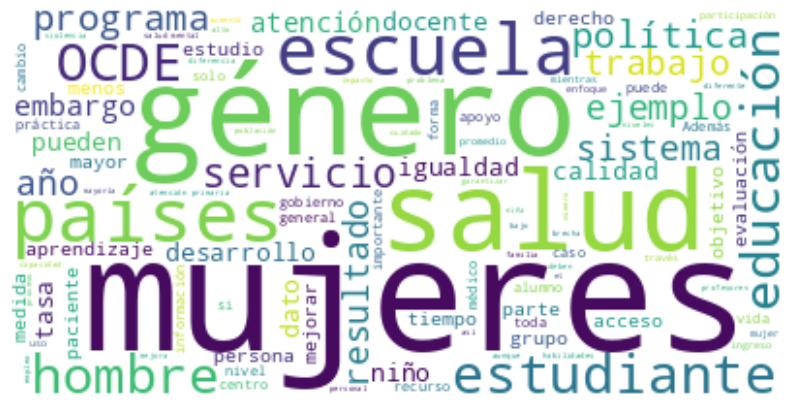

In [30]:
# Análisis 1: Nube de palabras (Word Cloud)
wordcloud = WordCloud(stopwords=spanish_stop_words, background_color="white", max_words=100).generate(" ".join(df_ods['Textos_espanol']))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Se puede visualizar en esta nube de palabras, que las palabras entre su tamaño sea mayor, es debido a que se repite mas veces dentro de los datos, asi teniendo entre los datos mas repetido con palabras mas grandes genero, salud, mujeres, paises, escuela etc...

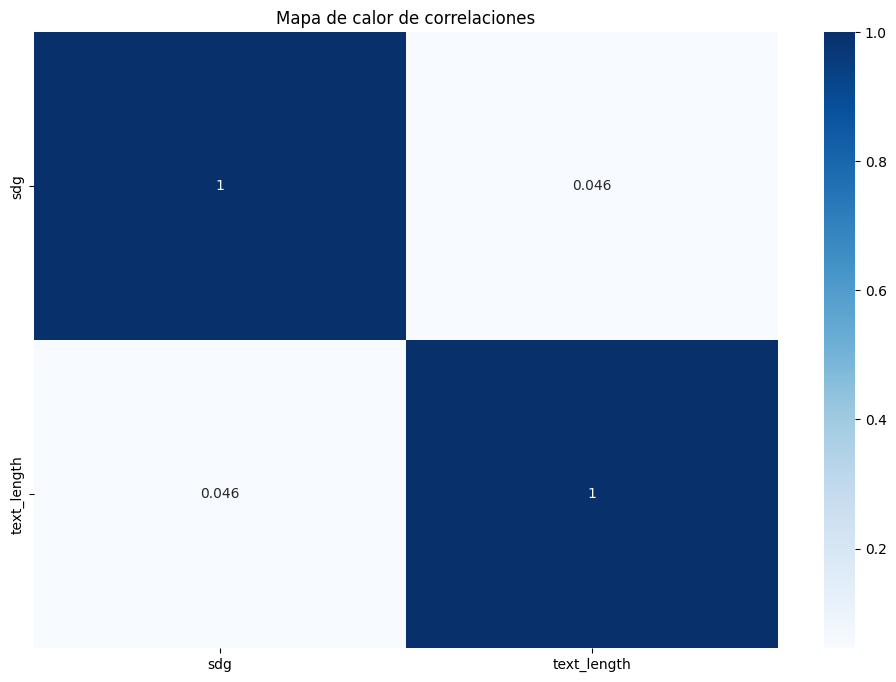

In [31]:
# Análisis 2: Correlación entre la longitud de los textos y las clases
class_length_corr = df_ods[['sdg', 'text_length']].corr()


# Análisis de correlación entre variables numéricas para buscar dependencias
datos_numericos = df_ods.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(datos_numericos.corr(),  cmap="Blues", annot=True)
plt.title('Mapa de calor de correlaciones')
plt.show()

El valor de correlación es 0.046, lo cual indica una correlación positiva muy débil entre el ODS asociado a cada opinión (sdg) y la longitud del texto (text_length).
Este valor tan bajo sugiere que la longitud del texto no está significativamente relacionada con el ODS al que corresponde la opinión ciudadana. En otras palabras, no parece haber una relación fuerte o evidente entre la cantidad de palabras usadas y si una opinión está más relacionada con el ODS 3, 4 o 5. La correlación de una variable consigo misma es siempre 1, como se observa en los valores de la diagonal principal del mapa de calor.

## 1.2 Calidad de datos

### 1.2.1 Completitud

In [32]:
# Porcentaje de valores nulos por columna
((df_ods.isnull().sum()/df_ods.shape[0])).sort_values(ascending=False)

,0
Textos_espanol,0.0
sdg,0.0
text_length,0.0


No se encuentra valores nulos en ninguna columna, ni por el contenido,ni el texto, ni el largo del texto

### 1.2.2 Unicidad

In [33]:
df_ods.duplicated(keep = False).sum()

0

Los datos son unicos y no se repiten.

### 1.2.3 Consistencia

In [34]:
df_ods.dtypes

,0
Textos_espanol,object
sdg,int64
text_length,int64



Las columnas y sus datos son consistentes con lo que se espera segun el modelo de datos, al ser textos tendran que ser manipulados mas adelante con normalizacion y tokenizacion

### 1.2.4 Validez

In [35]:
df_ods["sdg"].value_counts(dropna=False)

,count
sdg,
5,1451
4,1354
3,1244


# Preparacion de datos

Resolver problemas de codificacion

In [36]:
# Create a mapping of UTF-8 misinterpreted characters to their correct ANSI equivalent
utf8_to_ansi_map = {
    'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú',
    'Ã±': 'ñ', 'ÃÁ': 'Á', 'Ã‰': 'É', 'ÃÍ': 'Í', 'ÃÓ': 'Ó',
    'ÃÚ': 'Ú', 'Ã‘': 'Ñ', 'Â¿': '¿', 'Â¡': '¡'
}

# Function to replace UTF-8 misinterpreted characters with ANSI equivalents
def replace_utf8_with_ansi(text):
    for utf8_char, ansi_char in utf8_to_ansi_map.items():
        text = text.replace(utf8_char, ansi_char)
    return text

df_manipulado = df_ods.copy()
# Apply the fix to the problematic column
df_manipulado['Textos_espanol'] = df_ods['Textos_espanol'].apply(replace_utf8_with_ansi)
df_manipulado.sample(5)


,Textos_espanol,sdg,text_length
530,Las habilidades sociales son un determinante c...,3,599
847,"En el Reino Unido, los ADE pueden representar ...",3,594
15,Estas estaciones cuentan con asistentes médico...,3,547
4037,A pesar de que las mujeres están en el mercado...,5,773
1229,Se consideró que el éxito de las reformas al p...,4,474


Verificamos y todos los textos se encuentran en español por lo tanto es importante tener una buena preparcion de datos con respecto a los caracteres especiales.  Se define un mapeo entre los caracteres UTF-8 mal interpretados y sus equivalentes en ANSI para hacer este proceso. Se extrae una muestra de 5 filas aleatorias del DataFrame df_manipulado para verificar cómo quedaron los textos después de la corrección

Convertir en tokens

In [37]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in spanish_stop_words]
    return ' '.join(tokens)


df_manipulado['processed_text'] = df_manipulado['Textos_espanol'].apply(preprocess_text)
df_manipulado

,Textos_espanol,sdg,text_length,processed_text
0,"Por ejemplo, el número de consultas externas d...",3,944,ejemplo número consultas externas especialista...
1,"En 2007, el gobierno central financió directam...",3,476,2007 gobierno central financió directamente so...
2,"Claramente, hay muchos otros factores en juego...",3,1207,claramente factores juego particular variedad ...
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,ejemplo australiano victoria creó agencia prom...
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,consumo anual alcohol estima litros año hombre...
...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,822,ello identificará cuestiones género destacadas...
4045,La participación de las mujeres en roles de li...,5,514,participación mujeres roles liderazgo dentro l...
4046,"Según el WEF, según las tendencias de 2016, po...",5,445,según wef según tendencias 2016 podría cerrars...
4047,"Sirve como recurso y foro para las agencias, c...",5,1017,sirve recurso foro agencias objetivo lograr en...


El objetivo es normalizar los textos para futuros análisis, eliminando caracteres irrelevantes y facilitando el procesamiento natural del lenguaje (NLP).

**Convertir a minúsculas (text.lower()):**

Esta conversión uniformiza las palabras, eliminando la diferencia entre mayúsculas y minúsculas. Por ejemplo, "Gobierno" y "gobierno" serán tratadas como la misma palabra.


**Tokenización (word_tokenize(text)):**

La tokenización separa el texto en palabras o "tokens". Esto para poder evaluar las palabras invidualmente
Ejemplo: "El consumo anual de alcohol" → ["El", "consumo", "anual", "de", "alcohol"].

**Eliminar puntuación y palabras vacías:**

Puntuación: Se eliminan tokens que no son alfanuméricos, como comas y puntos.
Stopwords: Las palabras vacías (palabras comunes como "de", "el", "y") se eliminan. Esto es útil porque estas palabras no suelen agregar significado a los análisis de texto.


**Unir los tokens (' '.join(tokens)):**

Se reconstruye el texto a partir de los tokens filtrados. El resultado es un texto sin puntuación, palabras comunes, y con solo palabras relevantes para el análisis.

Lemalizacion

In [42]:
# 4. Transform to vectors: Using TF-IDF for text representation

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_manipulado['processed_text'])


Convertimos cada texto en un vector numérico, donde cada entrada representa la relevancia de una palabra para ese texto en particular. Este vector será usado como entrada para el modelo de clasificación.

In [39]:
y = df_ods['sdg']

In [40]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = rf_model.predict(X_test)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ODS 3', 'ODS 4', 'ODS 5'])
print(accuracy)
print(report)

0.9703703703703703
              precision    recall  f1-score   support

       ODS 3       0.98      0.98      0.98       250
       ODS 4       0.96      0.97      0.97       268
       ODS 5       0.98      0.96      0.97       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



Se utiliza un Random Forest con 100 árboles (n_estimators=100), que es un modelo de clasificación basado en la agregación de múltiples árboles de decisión. Es robusto y reduce el riesgo de sobreajuste.

**ODS 3:**

Precisión : 0.98, lo que significa que el 98% de las predicciones de la clase ODS 3 fueron correctas. El modelo rara vez clasifica erróneamente otros textos como ODS 3.

Recall: 0.98, lo que indica que el modelo pudo capturar el 98% de los textos que realmente pertenecen a ODS 3.

F1-Score: 0.98, que es un equilibrio excelente entre precisión y recall para esta clase. Esto refleja un rendimiento casi perfecto en ODS 3.

**ODS 4:**

Precisión : 0.96, lo que muestra que el modelo tiene una tasa de aciertos alta cuando predice ODS 4.

Recall: 0.97, lo que indica que el modelo fue capaz de identificar correctamente la mayoría de los textos que realmente pertenecen a ODS 4.

F1-Score: 0.97, lo que refleja una ligera mejora en comparación con la precisión, lo que significa que hay un excelente equilibrio entre las métricas en esta clase.

**ODS 5:**

Precisión : 0.98, lo que indica que la tasa de aciertos del modelo para las predicciones de ODS 5 es muy alta

Recall: 0.96, lo que significa que el 96% de los textos que pertenecen a ODS 5 fueron correctamente clasificados

F1-Score: 0.97, lo que muestra una fuerte consistencia entre precisión y recall, lo que indica un buen rendimiento global para esta clase

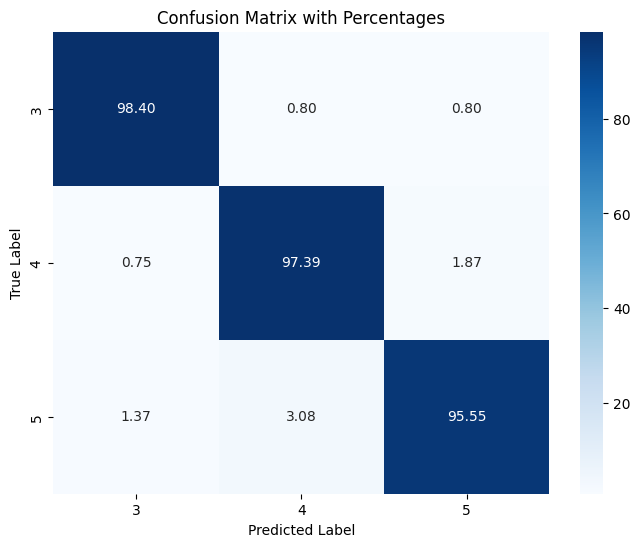

In [41]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to show percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create a heatmap for the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[3, 4, 5], yticklabels=[3, 4, 5])
plt.title('Confusion Matrix with Percentages')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**ODS 3 (fila 1):**

98.40% de los textos clasificados como ODS 3 son correctos.
0.80% de los textos que deberían ser ODS 3 se clasificaron incorrectamente como ODS 4.
0.80% de los textos que deberían ser ODS 3 se clasificaron incorrectamente como ODS 5.

Conclusión: El modelo tiene un rendimiento excelente en la clasificación de textos de ODS 3, con muy pocos errores de clasificación hacia las otras dos clases.


**ODS 4 (fila 2):**

97.39% de los textos clasificados como ODS 4 son correctos.
0.75% de los textos que deberían ser ODS 4 se clasificaron incorrectamente como ODS 3.
1.87% de los textos que deberían ser ODS 4 se clasificaron incorrectamente como ODS 5.

Conclusión: El modelo también muestra una gran precisión en ODS 4, con una leve confusión hacia ODS 5, pero la mayoría de las predicciones son correctas.


**ODS 5 (fila 3):**

95.55% de los textos clasificados como ODS 5 son correctos.
1.37% de los textos que deberían ser ODS 5 se clasificaron incorrectamente como ODS 3.
3.08% de los textos que deberían ser ODS 5 se clasificaron incorrectamente como ODS 4.

Conclusión: Aunque la precisión es alta, ODS 5 tiene la mayor confusión en comparación con las otras clases. Aproximadamente el 4.45% de los textos son clasificados erróneamente, principalmente hacia ODS 4.

In [43]:
# 4. Transform to vectors: Using TF-IDF for text representation

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_manipulado['processed_text'])
y = df_ods['sdg']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)  # Default to 3 neighbors for now
knn.fit(X_train, y_train)

# Predict the target for the test set
y_pred = knn.predict(X_test)

# Evaluate the model using a classification report
classification_report_result = classification_report(y_test, y_pred)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ODS 3', 'ODS 4', 'ODS 5'])
print(accuracy)
print(report)


0.9395061728395062
              precision    recall  f1-score   support

       ODS 3       0.93      0.93      0.93       250
       ODS 4       0.94      0.95      0.95       268
       ODS 5       0.94      0.93      0.94       292

    accuracy                           0.94       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.94      0.94      0.94       810



El algoritmo K-Nearest Neighbors (KNN) con 3 vecinos ha generado un resultado de clasificación con una precisión general de 0.94 (93.95%)

**ODS 3:**

Precisión : 0.93 significa que el 93% de las veces que el modelo predijo la clase ODS 3, estaba en lo correcto.

Recall: 0.93 indica que el modelo fue capaz de capturar el 93% de los textos que realmente pertenecen a ODS 3.

F1-Score: 0.93, que es un balance entre la precisión y el recall, muestra un buen rendimiento en esta clase.

**ODS 4:**

Precisión : 0.94 muestra que el modelo tiene una alta tasa de aciertos cuando predice ODS 4.

Recall: 0.95 indica que la mayoría de los textos pertenecientes a ODS 4 fueron correctamente clasificados.

F1-Score: 0.95, lo que muestra un equilibrio excelente entre la precisión y el recall para esta clase.

**ODS 5:**

Precisión : 0.94, lo que indica que la tasa de aciertos del modelo en predicciones de ODS 5 es alta.

Recall: 0.93 muestra que el 93% de los textos que pertenecen a ODS 5 fueron correctamente clasificados.

F1-Score: 0.94, mostrando una consistencia sólida entre precisión y recall en esta clase.

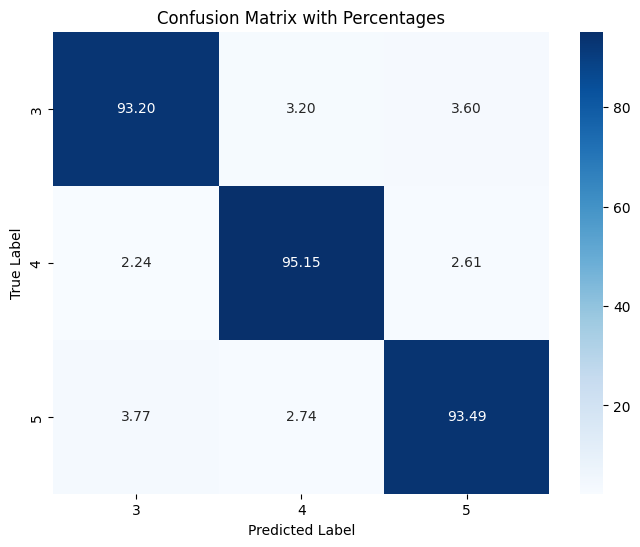

In [46]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to show percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create a heatmap for the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[3, 4, 5], yticklabels=[3, 4, 5])
plt.title('Confusion Matrix with Percentages')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**ODS 3 (fila 1):**

93.20% de los textos clasificados como ODS 3 son correctos. 3.20% de los textos que deberían ser ODS 3 se clasificaron incorrectamente como ODS 4. 3.60% de los textos que deberían ser ODS 3 se clasificaron incorrectamente como ODS 5.

Conclusión: El modelo tiene un buen rendimiento en la clasificación de textos de ODS 3, pero presenta errores de clasificación hacia las otras dos clases, particularmente con ODS 5.

**ODS 4 (fila 2):**

95.15% de los textos clasificados como ODS 4 son correctos. 2.24% de los textos que deberían ser ODS 4 se clasificaron incorrectamente como ODS 3. 2.61% de los textos que deberían ser ODS 4 se clasificaron incorrectamente como ODS 5.

Conclusión: El modelo muestra un gran rendimiento en ODS 4, con leves confusiones hacia ODS 3 y ODS 5, pero la mayoría de las predicciones son correctas.

**ODS 5 (fila 3):**

93.49% de los textos clasificados como ODS 5 son correctos. 3.77% de los textos que deberían ser ODS 5 se clasificaron incorrectamente como ODS 3. 2.74% de los textos que deberían ser ODS 5 se clasificaron incorrectamente como ODS 4.

Conclusión: Aunque la precisión es alta, ODS 5 presenta confusiones en comparación con las otras clases, especialmente con ODS 3. Aproximadamente el 6.51% de los textos son clasificados erróneamente.

In [47]:
# 4. Transform to vectors: Using TF-IDF for text representation

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_manipulado['processed_text'])
y = df_ods['sdg']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

y_pred = cart_model.predict(X_test)
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ODS 3', 'ODS 4', 'ODS 5'])
print(accuracy)
print(report)

0.9246913580246914
              precision    recall  f1-score   support

       ODS 3       0.89      0.91      0.90       250
       ODS 4       0.94      0.91      0.92       268
       ODS 5       0.94      0.95      0.95       292

    accuracy                           0.92       810
   macro avg       0.92      0.92      0.92       810
weighted avg       0.92      0.92      0.92       810



El modelo de Árbol de Decisión (Decision Tree Classifier) ha generado un resultado de clasificación con una precisión general de 0.92 (92.47%)

**ODS 3:**

Precisión: 0.89 significa que el 89% de las veces que el modelo predijo la clase ODS 3, estuvo en lo correcto.
Recall: 0.91 indica que el modelo fue capaz de capturar el 91% de los textos que realmente pertenecen a ODS 3.
F1-Score: 0.90, que es un balance entre la precisión y el recall, muestra un rendimiento adecuado para esta clase.

**ODS 4:**

Precisión: 0.94 muestra que el modelo tiene una alta tasa de aciertos cuando predice ODS 4.
Recall: 0.91 indica que la mayoría de los textos pertenecientes a ODS 4 fueron correctamente clasificados, aunque hay algunas confusiones.
F1-Score: 0.92, lo que muestra un buen equilibrio entre la precisión y el recall para esta clase.

**ODS 5:**

Precisión: 0.94, lo que indica que la tasa de aciertos del modelo en predicciones de ODS 5 es alta.
Recall: 0.95 muestra que el 95% de los textos que pertenecen a ODS 5 fueron correctamente clasificados.
F1-Score: 0.95, demostrando una excelente consistencia entre precisión y recall en esta clase.